In [40]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

np.random.seed(42)

Q1
Let tickets collected by Alice and Bob be represented by r.v.s $X$ and $Y$
$$ X \sim Poisson(10) $$
$$ Y \sim Poisson(15) $$

Let $A$ denote the event that Alice collected in place of Bob
Priori $P(A) = \frac{1}{11}$,
$$P(A|y) = \frac{P(y|A) P(A)}{P(y)}$$
where $y$ represents the information obtained by the observed data

the maximum likelihood estimate of the poisson parameter $\lambda$ as obtained by the given data is $\hat{\lambda} = 9.6$

$$P(y_i|A) = \frac{{10}^{y_i}}{y_i!} e^{-10}$$
$$P(y|A) = \prod_{i=1}^{5} P(y_i|A)$$
$$P(y) = P(y|A) P(A) + P(y|\bar{A}) P(\bar{A}) $$

where for $\bar{A}$, $\lambda = 15$


In [41]:
y = np.array([ 12, 10, 11, 4, 11])

direcly performing operations would result in big ints
hence I use log to reduce

$$\log P(y|\lambda) = \sum (-\lambda + y_i \log \lambda - \log y_i!)$$
$$\log P(y|\lambda) = -5\lambda + \log \lambda \sum y_i - \sum \log y_i! $$

In [42]:
log_arr = np.log(np.vectorize(math.factorial)(y))
def calculate_conditional_prob(l):
    log_prob_y_given_theta = -5*l + np.log(l) * y.sum() - log_arr.sum()
    prob_y_given_theta = np.exp(log_prob_y_given_theta)
    return prob_y_given_theta

In [43]:
priori_a = 1/11
prob_y_given_a = calculate_conditional_prob(10)
prob_y_given_b = calculate_conditional_prob(15)

posteriori = 1/(1 + (prob_y_given_b * (1-priori_a))/(prob_y_given_a * priori_a))

In [44]:
print(f"the manager’s posterior odds that Alice is filling in for Bob are {posteriori/(1-posteriori):.3f}")

the manager’s posterior odds that Alice is filling in for Bob are 25.409


Q2
$$X\sim N\left( \theta ,4\right)$$
priori pdf $$ \theta \sim N\left( 5,9\right)$$

(A)
![](/aakashks/assets/math_handwriting/Screenshot 2023-06-26 160505.png)
![](/aakashks/assets/math_handwriting/Screenshot 2023-06-26 160909.png)

(B)

In [45]:
mu_prior = 5
var_prior = 9
a = 1/var_prior
b = 1
sample_mean = 6
mu_post = (a*mu_prior + b*sample_mean)/(a+b)
var_post = 1/(a+b)

In [46]:
print(f'hence it is N({mu_post:.1f},{var_post:.1f})')

hence it is N(5.9,0.9)


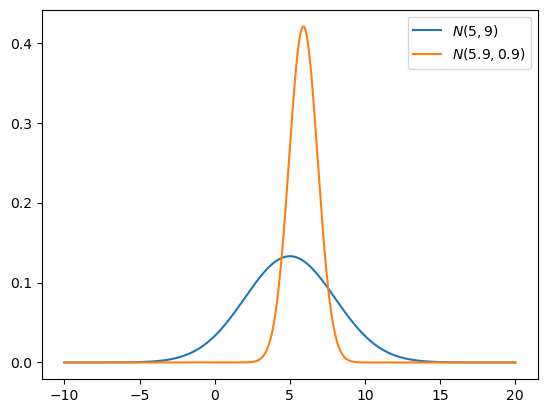

In [47]:
xvals = np.linspace(-10, 20, 1000)
plt.plot(xvals, norm.pdf(xvals, loc = mu_prior, scale = np.sqrt(var_prior)), label='$N(5,9)$')
plt.plot(xvals, norm.pdf(xvals, loc = mu_post, scale = np.sqrt(var_post)), label='$N(5.9, 0.9)$')
plt.legend()

(C) \
the more data we receive, the more certain we are about the theta value.
this is because increasing $n$ decreases the $\sigma_{post}^2$ 
and by more values we make the $\mu_{post}$ reach closer to the sample mean

(D)

In [48]:
# we'll use the same formula with different prior values and test variances

mu_prior = 100
var_prior = 15**2
test_var = 100
b = 1/test_var
a = 1/var_prior

def expected_IQ(score):
    mu_post = (a*mu_prior + b*score)/(a+b)
    return mu_post

vard_IQ = expected_IQ(80)
taft_IQ = expected_IQ(150)

print(f"Vard's IQ = {vard_IQ:.2f} and Taft's IQ = {taft_IQ:.2f}")


Vard's IQ = 86.15 and Taft's IQ = 134.62


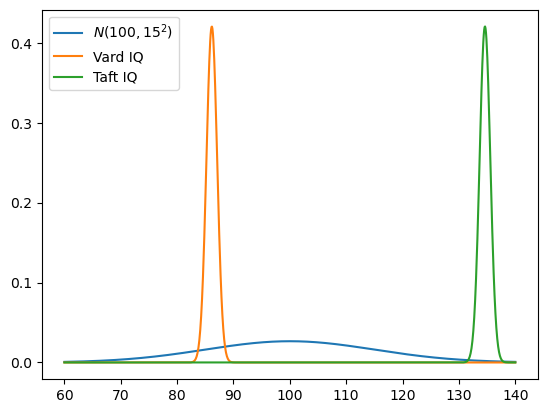

In [49]:

xvals = np.linspace(60, 140, 1000)
plt.plot(xvals, norm.pdf(xvals, loc=mu_prior, scale=np.sqrt(var_prior)), label='$N(100,15^2)$')
plt.plot(xvals, norm.pdf(xvals, loc=vard_IQ, scale=np.sqrt(var_post)), label='Vard IQ')
plt.plot(xvals, norm.pdf(xvals, loc=taft_IQ, scale=np.sqrt(var_post)), label='Taft IQ')
plt.legend()


Q3
MLE on Gaussian dist parameters yields

$$\hat{\mu} = \frac{1}{n}{\sum_{i=1}^n X_i}$$

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (X_i-\bar{X})^2$$

In [50]:
# given dataset as a numpy array 

mu, sigma, size = 0., 1., 1000
gaussian_data = np.random.normal(mu, sigma, size)


In [51]:
mu_estimate = np.mean(gaussian_data)


In [52]:
sigma_estimate = np.sqrt(np.var(gaussian_data))

In [53]:
print(mu_estimate, sigma_estimate)

0.01933205582232549 0.9787262077473543


Q4



the likelihood function $$L(\theta) = P(Y|X;\theta)$$
$$ L(\theta) = \prod \big({h_\theta (x^{(i)})}\big)^{y^{(i)}} \big({1 - h_\theta (x^{(i)})}\big)^{ 1-y^{(i)}} $$
$$\textrm{log-likelihood, }\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) \right]$$

prior is $P(\theta)  = N(\theta; \bold{\mu}, \bold{\sum})$

$$\text{posterior is, } P(\theta|data) = \frac{P(data|\theta) P(\theta)}{P(data)}$$

to apply MAP we have to maximise $\theta$ \
as $ P(data) $ is independent of $\theta$, 

$$ \hat{\theta}  = \text{argmax  } {P(data|\theta) P(\theta)} $$
$$ \implies \hat{\theta} = argmax \big( logP(D|\theta) +logP(\theta)\big)  $$
$$ \implies \hat{\theta} = argmax \big( \ell(\theta) - \frac{1}{2}{\theta^T \Sigma^{-1}\theta} \big) $$

where $\mu = 0$

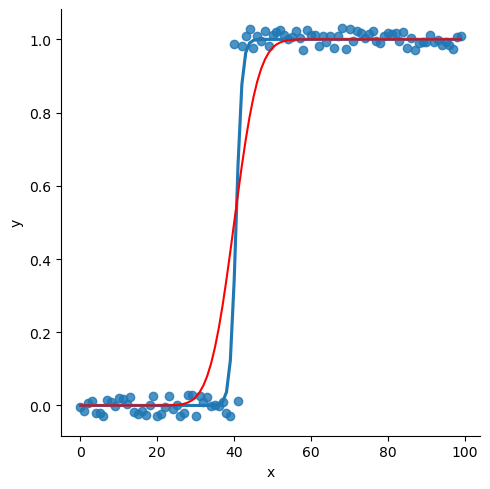

In [54]:
# for simplicity the dimensions of the data , X is 100, 1 only

# creating custom binary classification data
data_x = np.arange(0, 100)

# setting the parameters values as 40, 5
probabilities = norm.cdf(data_x, loc=40, scale=5)
random_vals = np.random.random(data_x.shape)

data_y = np.where(random_vals < probabilities, 1, 0)

df = pd.DataFrame({'x': data_x, 'y': data_y})
sns.lmplot(x="x", y="y", data=df, logistic=True, ci=None, y_jitter=0.03)
plt.plot(data_x, probabilities, color='red', label='original')

In [95]:
# intial theta
theta_initial = 0.04

# prior on theta is suppose N(50, 25)
prior_mean = 50
prior_variance = 25

# writing the function to be maximised
def sigmoid(x_i, theta):
    return 1/(1 + np.exp(-theta * x_i))

def h(x, theta):
    return np.vectorize(sigmoid)(x, theta)

def argmin_function(x, y, theta, mean, var):
    h_array = h(theta, x)
    log_likelihood = y.dot(np.log(h_array)) + (1-y).dot(np.log(1-h_array))
    log_prior = - (theta-mean)**2/(2*var)
    log_posterior = log_likelihood + log_prior
    
    return -log_posterior


In [96]:
h(data_x, theta_initial)

array([0.5       , 0.50999867, 0.51998934, 0.52996405, 0.53991488,
       0.549834  , 0.55971365, 0.56954622, 0.57932425, 0.58904043,
       0.59868766, 0.60825903, 0.61774787, 0.62714777, 0.63645254,
       0.64565631, 0.65475346, 0.6637387 , 0.67260702, 0.68135373,
       0.68997448, 0.69846522, 0.70682222, 0.71504211, 0.72312181,
       0.73105858, 0.73885001, 0.74649398, 0.75398872, 0.76133271,
       0.76852478, 0.77556401, 0.78244978, 0.78918171, 0.7957597 ,
       0.80218389, 0.80845465, 0.81457258, 0.82053848, 0.82635335,
       0.83201839, 0.83753494, 0.84290453, 0.84812884, 0.85320966,
       0.85814894, 0.86294871, 0.86761113, 0.87213843, 0.87653295,
       0.88079708, 0.88493327, 0.88894403, 0.89283193, 0.89659955,
       0.90024951, 0.90378446, 0.90720705, 0.91051994, 0.91372581,
       0.9168273 , 0.91982709, 0.9227278 , 0.92553205, 0.92824246,
       0.93086158, 0.93339196, 0.93583612, 0.93819653, 0.94047563,
       0.94267582, 0.94479946, 0.94684886, 0.9488263 , 0.95073

In [97]:
# the above result is not what I desire, so will look on it later

Q5
VC dimension

a. 0 
the constant function never guarantees to be in any way of a data point
so all the +, - data points can be on one side only and would never be shattered

b. d+1
linear classifier of d dimension known result

c. 4
there exists a set of 4 points on the plane which can always be shattered
but for 5 points no set of 5 point would satisfy

d. 2
obviously 2 points can be shattered
but there is no such set of 3 point which can be shattered in the orientation +-+
